In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score

In [170]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [171]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [172]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [173]:
df.shape

(614, 13)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [175]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [176]:
df = df.dropna()

In [177]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [178]:
df.shape


(480, 13)

In [179]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [180]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [181]:
df.replace({"Loan_Status" : {"Y" :1, "N" : 0}}, inplace = True)

<ipython-input-181-a2ef615a301e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status" : {"Y" :1, "N" : 0}}, inplace = True)


In [182]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='count'>

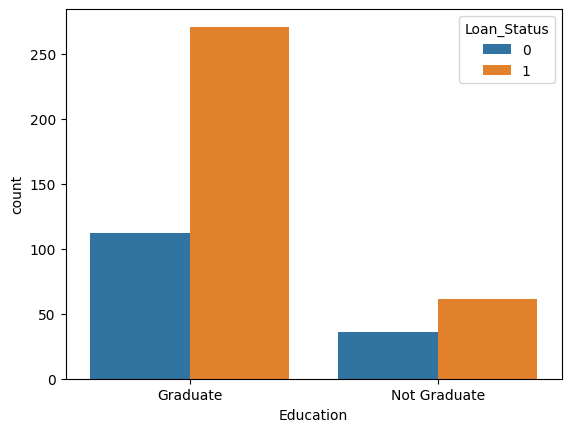

In [183]:
sns.countplot(x='Education', hue='Loan_Status', data = df)

In [184]:
df = df.replace(to_replace ='3+', value = 4)

<Axes: xlabel='Self_Employed', ylabel='count'>

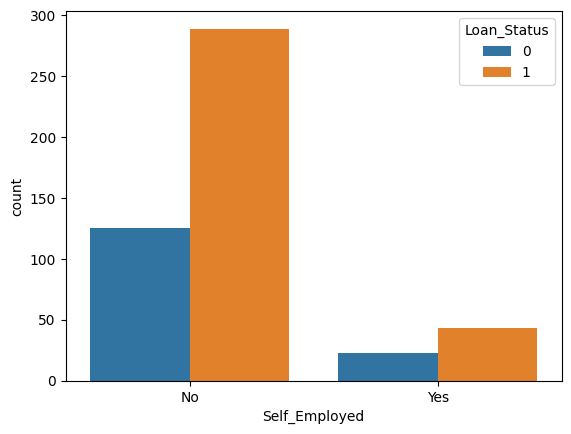

In [185]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data = df)

In [186]:
df.replace({"Gender" : {"Male" :0, "Female" : 1}}, inplace = True)

In [187]:
df.replace({"Married" : {"Yes" :0, "No" : 1}}, inplace = True)

In [188]:
df.replace({"Education" : {"Graduate" :0, "Not Graduate" : 1}}, inplace = True)

In [189]:
df.replace({"Self_Employed" : {"Yes" :0, "No" : 1}}, inplace = True)

In [190]:
df.replace({"Loan_Status" : {"Y" :0, "N" : 1}}, inplace = True)

In [191]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,0,4,0,1,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,0,2,0,1,7583,0.0,187.0,360.0,1.0,Urban,1


In [192]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,0,4,0,1,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,0,2,0,1,7583,0.0,187.0,360.0,1.0,Urban,1


In [193]:
df.replace({"Property_Area" : {"Rural" :0, "Urban" : 1, "Semiurban":2}}, inplace = True)

In [194]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,0,4,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,0,0,2,0,1,7583,0.0,187.0,360.0,1.0,1,1


In [195]:
df = df.drop(columns = 'Loan_ID', axis =1)

In [196]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,1
5,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,0,0,4,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,1,1
612,0,0,2,0,1,7583,0.0,187.0,360.0,1.0,1,1


In [197]:
X = df.drop(columns = 'Loan_Status', axis = 1)

In [198]:
y = df['Loan_Status']

In [206]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1
5,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0
610,0,0,4,0,1,4106,0.0,40.0,180.0,1.0,0
611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,1
612,0,0,2,0,1,7583,0.0,187.0,360.0,1.0,1


In [205]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2, stratify = y)

In [217]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
337,0,0,2,0,0,2500,4600.0,176.0,360.0,1.0,0
358,0,0,0,1,1,3000,1666.0,100.0,480.0,0.0,1
405,1,1,0,0,1,4547,0.0,115.0,360.0,1.0,2
248,0,0,1,0,1,2882,1843.0,123.0,480.0,1.0,2
457,0,0,0,0,1,3708,2569.0,173.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
459,0,0,0,0,1,8334,0.0,160.0,360.0,1.0,2
275,0,0,1,0,1,2750,1842.0,115.0,360.0,1.0,2
76,0,1,0,0,1,3750,4750.0,176.0,360.0,1.0,1
286,1,1,0,0,0,2600,1717.0,99.0,300.0,1.0,2


In [218]:
classifier = svm.SVC(kernel = 'linear')

In [219]:
print(y_train)

337    1
358    0
405    1
248    1
457    0
      ..
459    0
275    1
76     0
286    0
389    1
Name: Loan_Status, Length: 384, dtype: int64


In [220]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [221]:
X_train_prediction = classifier.predict(X_train)

In [222]:
accuracy_train = accuracy_score(X_train_prediction, y_train)

In [223]:
print(accuracy_train)

0.78125


In [224]:
X_test_prediction = classifier.predict(X_test)
accuracy_test = accuracy_score(X_test_prediction, y_test)
print(accuracy_test)

0.8020833333333334
